In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [106]:
from utils import create_hover_data, hover_array


In [123]:
DATA_DIR = "."

In [124]:
df_labels = pd.read_csv(os.path.join(DATA_DIR, "stage1_train_labels.csv"))

In [125]:
print(df_labels)

                                                 ImageId  \
0      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
1      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
2      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
3      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
4      00071198d059ba7f5914a526d124d28e6d010c92466da2...   
...                                                  ...   
29456  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29457  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29458  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29459  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   
29460  ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...   

                                           EncodedPixels  
0      6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...  
1      36269 7 36523 11 36778 13 37033 15 37288 17 37...  
2      19919 6 20174 8 20429 10 20685 11 20941 12 211...  
3      18671 6 18926 8 19181 9 19436 10 196

In [10]:
pixels_str = df_labels["EncodedPixels"][0]
img_id = df_labels["ImageId"][0]
print(pixels_str, img_id)

6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440 9 8696 9 8952 9 9209 8 9465 8 9722 7 9978 7 10235 6 10493 4 10752 1 00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552


In [126]:
img = plt.imread(os.path.join(DATA_DIR, "stage1_train",img_id,"images",img_id+".png"))
img_shape = img.shape
print(img_shape)

(256, 256, 4)


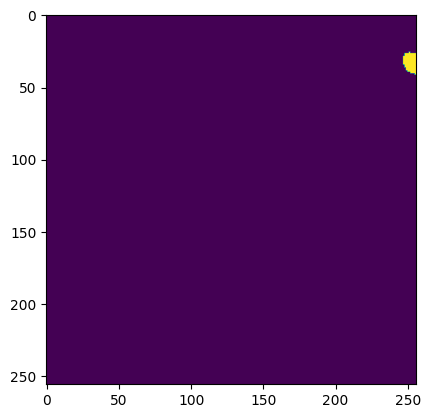

In [110]:
def encoded_pixels_to_mask(pixels_str, shape):
    """
    Parses string with encoded pixels, returns mask (one nuclei) in a form of numpy array
    """
    pixels_str = pixels_str.strip().split(" ")
    ranges_dict = {int(pixels_str[i]): int(pixels_str[i+1]) for i in range(0, len(pixels_str)-1, 2)}
    arr = np.zeros(shape).flatten()
    # print(arr)

    for pixel_start, pixel_range in ranges_dict.items():
        for i in range(pixel_range):
            arr[pixel_start + i - 1] = 1

    # plt.imshow(np.reshape(arr, shape))
    # plt.plot()
    return(np.reshape(arr, shape))
    

    
mask = encoded_pixels_to_mask(pixels_str, img_shape[:2])
plt.imshow(mask)

In [119]:
df_img = df_labels[df_labels["ImageId"] == img_id]


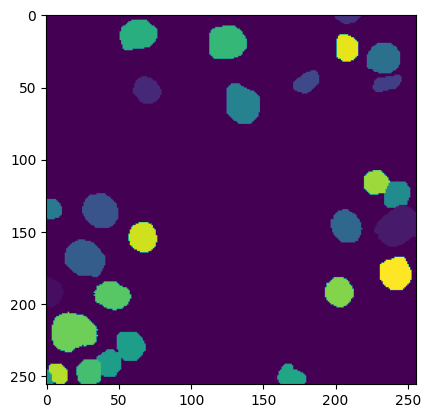

In [127]:
def extract_img_masks(df_labels, img_id, img_shape):
    encoded_pixels = df_labels[df_labels["ImageId"] == img_id]["EncodedPixels"].to_numpy()
    res_arr = np.zeros(img_shape)
    
    for i in range(len(encoded_pixels)):
        # print(i)
        mask = encoded_pixels_to_mask(encoded_pixels[i], img_shape)
        # plt.imshow(mask * (i + 1))
        # plt.show()
        res_arr += encoded_pixels_to_mask(encoded_pixels[i], img_shape) * (i + 1)

    return res_arr

img_id = "0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9"
img = plt.imread(os.path.join(DATA_DIR, "stage1_train",img_id,"images",img_id+".png"))
img_shape = img.shape

all_masks = extract_img_masks(df_labels, img_id, img_shape[:2])

plt.imshow(all_masks)

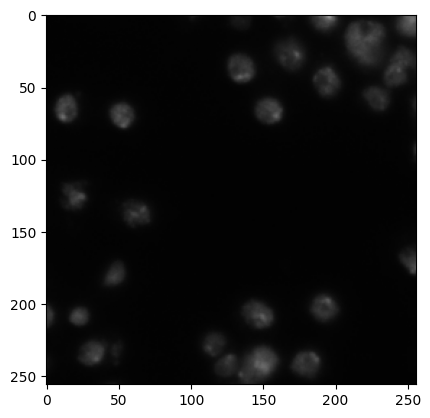

In [71]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


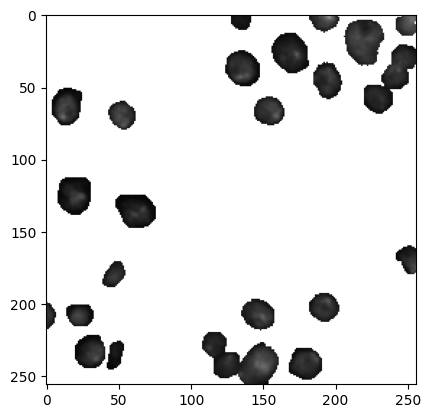

In [107]:
mask_true = hover_array((os.path.join(DATA_DR"stage1_train",img_id)))
plt.imshow(mask_true)

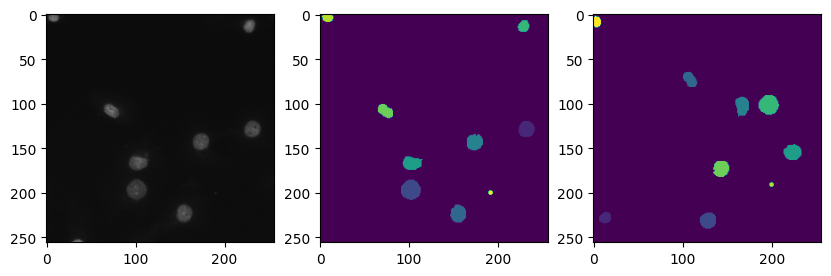

In [108]:
img_id_2 = "0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe"
img_2 = plt.imread(os.path.join("stage1_train",img_id_2,"images",img_id_2+".png"))
img_shape_2 = img_2.shape

mask_true = hover_array((os.path.join("stage1_train",img_id_2)))
mask_from_labels = extract_img_masks(df_labels, img_id_2, img_shape_2[:2])

fig, axes = plt.subplots(1,3, figsize=(10,30))
axes[0].imshow(img_2)
axes[1].imshow(mask_true[:,:,3])
axes[2].imshow(mask_from_labels)

In [112]:
arr = np.arange(10).reshape(2,5)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

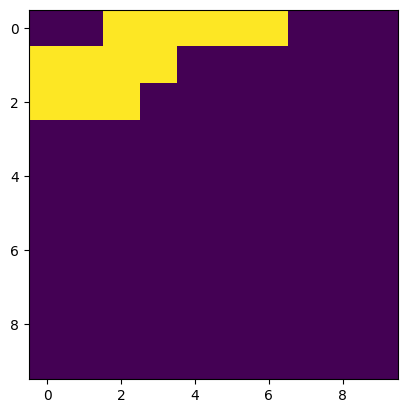

In [116]:
test_encoded="3 5 11 4 21 3"
test_mask = encoded_pixels_to_mask(test_encoded, (10, 10))
plt.imshow(test_mask)

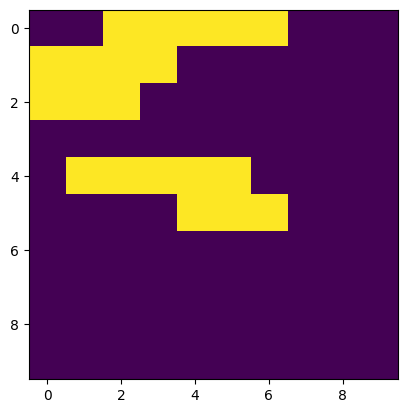

In [118]:
test_encoded="3 5 11 4 21 3 42 5 55 3"
test_mask = encoded_pixels_to_mask(test_encoded, (10, 10))
plt.imshow(test_mask)